# Project: Wrangle And Analyze a Dataset

# Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a>: <a href="#gather">Gather</a>, <a href="#assess">Assess</a>, <a href="#clean">Clean</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusion</a></li>
</ul>

<a id='intro'></a>
# Introduction
## Overview
**This Project:** Real-world data rarely comes clean. I will gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it, which is called data wrangling. Also, I will document my wrangling efforts, and showcase them through analyses and visualizations using Python (and its libraries).

**Data:-**
- The dataset being wrangled, analyzed and visualized is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs.
- WeRateDogs is a popular Twitter account that rates people's dogs with a humorous comment about the dog.
- The ratings given by WeRateDogs almost always have a denominator of 10, but the numerators are almost always greater than 10.
- The reason for this is because WeRateDogs believes that all dogs are good dogs, hence the higher ratings.
- WeRateDogs has over 4 million followers and has received international media coverage.

## Import Modules and Set-up tweepy

In [1]:
# Import all modules required
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import matplotlib.pyplot as plt

# Allowing visualizations to be plotted
%matplotlib inline

In [2]:
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

<a id='wrangling'></a>
# Data Wrangling

<a id='gather'></a>
## Gather

Sources:-
1. CSV file
2. Online TSV file
3. Twitter's API

### 1. CSV File

In [3]:
# Import csv into dataframe
df_archive = pd.read_csv("twitter_archive_enhanced.csv")

### 2. Online TSV File

In [4]:
# Define URL of file
url_image_predictions = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"

In [5]:
# Request the content of the url
r_image_predictions = requests.get(url_image_predictions)

In [6]:
# Check status
r_image_predictions.status_code

200

In [7]:
# Save output into a TSV file
with open("image_predictions.tsv", "w") as file:
    file.write(r_image_predictions.text)

In [8]:
# Read TSV file
df_image_predictions = pd.read_csv("image_predictions.tsv", sep="\t")

### 3. Twitter's API

In [9]:
tweet_ids = df_archive.tweet_id.values
len(tweet_ids)

2356

In [10]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0

# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        # for formatting purposes, this next line is commented
        # print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepyException as e:
            pass
        except KeyboardInterrupt as e:
            break

In [11]:
# Read the file line by line, then parse the JSON.
tweets = []
with open('tweet_json.txt', 'r') as file:
    for line in file:
        json_parsed = json.loads(line,) # Comma here to remove the "\n" extra character.
        # Add parsed JSON into the list
        tweets.append({"tweet_id": json_parsed["id_str"], "retweet_count": json_parsed["retweet_count"], "favorite_count": json_parsed["favorite_count"]})

In [12]:
df_tweet_meta = pd.DataFrame(tweets, columns=["tweet_id", "retweet_count", "favorite_count"]) # Save as a DataFrame

<a id='assess'></a>
## Assess

### Visual Assessment

In [13]:
df_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [14]:
df_image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [15]:
df_tweet_meta

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


### Programmatic Assessment

In [16]:
df_archive.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
685,788150585577050112,NaN,NaN,2016-10-17 22:51:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Leo. He's a golden chow. Rather h*ckin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/788150585...,13,10,Leo,None,None,None,None
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
720,783347506784731136,NaN,NaN,2016-10-04 16:46:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Kenny. He just wants to...,6.742918e+17,4.196984e+09,2015-12-08 18:17:56 +0000,https://twitter.com/dog_rates/status/674291837...,11,10,Kenny,None,None,None,None


In [17]:
df_archive.iloc[1004].text

'Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R'

In [18]:
len(df_archive[df_archive.rating_denominator!=10])

23

In [19]:
df_archive[df_archive.rating_denominator!=10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


It appears okay to have a denominator not 10.. but this can't be used with the others in EDA.. so I'll comment it as an issue.

In [20]:
df_archive.source.value_counts() # Checking if all are the same values.

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [21]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [22]:
df_archive.in_reply_to_status_id[df_archive.in_reply_to_status_id.notnull()]

30      8.862664e+17
55      8.816070e+17
64      8.795538e+17
113     8.707262e+17
148     8.634256e+17
            ...     
2038    6.715449e+17
2149    6.693544e+17
2169    6.678065e+17
2189    6.689207e+17
2298    6.670655e+17
Name: in_reply_to_status_id, Length: 78, dtype: float64

In [23]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [24]:
df_tweet_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


In [25]:
all_columns = pd.Series(list(df_archive) + list(df_image_predictions) + list(df_tweet_meta))
all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

In [26]:
df_archive.isnull().sum().sum()

11140

In [27]:
df_image_predictions.isnull().sum().sum()

0

In [28]:
df_tweet_meta.isnull().sum().sum()

0

In [29]:
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [30]:
df_image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [31]:
df_tweet_meta.describe()

,retweet_count,favorite_count
count,2354.000000,2354.000000
mean,3164.797366,8080.968564
std,5284.770364,11814.771334
min,0.000000,0.000000
25%,624.500000,1415.000000
50%,1473.500000,3603.500000
75%,3652.000000,10122.250000
max,79515.000000,132810.000000


In [32]:
df_archive.duplicated().sum()

0

In [33]:
df_image_predictions.duplicated().sum()

0

In [34]:
df_tweet_meta.duplicated().sum()

0

In [35]:
df_image_predictions.p1_dog.unique()

array([ True, False])

In [36]:
df_image_predictions.p2_dog.unique()

array([ True, False])

In [37]:
df_image_predictions.p3_dog.unique()

array([ True, False])

### Data Issues

#### Quality
1. Null values in `retweeted_`... columns and in `in_reply_to_` columns.
2. Timestamp includes +0000, which is uneeded because it's the same timezone for all the records.
3. Missing Values replaced by `None` when it should be `NaN`
4. Wrong Data Types:-
    - Data Type of `pupper`, `doggo`, `floofer`, and `puppo` is *object*, but it representes a *bool*.
    - Data Type of `tweet_id` in df_tweet_meta is *object* when it should be *int64*
    - Data Type of `retweeted_status_timestamp` and `timestamp` is *object* when it should be *datetime*
5. Text formatted poorely in the image predictions table.
6. Some predictions aren't dogs.
7. 3 different predictions for type of dog.
8. Irrelevant Data: ID 1004 in the archive table.
9. Twitter ID: 666287406224695296 in archive table.. wrong rating extracted. Should be 9/10 not 1/2.
10. 23 records have a denominator that is other than 10 in the archive table.
11. Image Predictions have missing records for some tweets. (Archive record count: 2356.. Image Prediction record count: 2075)
12. Some records in the archive aren't tweets, instead they are retweets.
13. Meaningless data & Missing Values: `in_reply_to_status_id`, `retweeted_status_id`, `retweeted_status_user_id`, and `in_reply_to_user_id`.
14. Sometimes the `name` column is "a" when the text contains: "This is `a` --".. this can be fixed but for the sake of simplicity, I won't fix it in this notebook.
15. Outliers in the `rating_numerator`

#### Tidiness
1. Type of dog should be only one column, not four.
2. Html tags form the source column in the archive are not required.

<a id='clean'></a>
## Clean

### Make a copy of data

In [38]:
df_archive_copy = df_archive.copy()
df_image_predictions_copy = df_image_predictions.copy()
df_tweet_meta_copy = df_tweet_meta.copy()

### Irrelevant Data
(Done first because the columns required to know if this is a retweet will be dropped)
- Retweets in the archive table
- Record with ID 1004 in the archive table
#### Define
1. Drop retweets
2. Drop record with ID 1004
#### Code

In [39]:
# Drops all rows where the "in_reply_to_user_id" column is not null
df_archive_copy.drop(df_archive_copy[df_archive_copy.in_reply_to_user_id.notnull()].index, inplace=True)

In [40]:
# Drops all rows where the "retweeted_status_user_id" column is not null
df_archive_copy.drop(df_archive_copy[df_archive_copy.retweeted_status_user_id.notnull()].index, inplace=True)

In [41]:
# Drops row with ID 1004
df_archive_copy.drop(1004, inplace=True)

#### Test

In [42]:
len(df_archive_copy[df_archive_copy.in_reply_to_user_id.notnull()])

0

In [43]:
df_archive_copy.iloc[1004].text

"Meet Travis and Flurp. Travis is pretty chill but Flurp can't lie down properly. 10/10 &amp; 8/10\nget it together Flurp https://t.co/Akzl5ynMmE"

### Missing Values

#### Define
Archive Table: Drop `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id` and `retweeted_status_timestamp` because they have a lot of null data and the data that isn't null is meaning less.

#### Code

In [44]:
df_archive_copy.drop(["in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp"], axis=1, inplace=True)

#### Test

In [45]:
df_archive_copy.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### None instead of NaN

#### Define
1. Change "None" to False and value to "True" for type of dog
2. Change "None" into NaN for name
#### Code

In [46]:
df_archive_copy.pupper = df_archive_copy.pupper.map({"None": False, "pupper": True})
df_archive_copy.puppo = df_archive_copy.puppo.map({"None": False, "puppo": True})
df_archive_copy.doggo = df_archive_copy.doggo.map({"None": False, "doogo": True})
df_archive_copy.floofer = df_archive_copy.floofer.map({"None": False, "floofer": True})

In [47]:
df_archive_copy.name = df_archive_copy.name.replace('None', np.nan)

#### Test

In [48]:
df_archive_copy.sample(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1494,692568918515392513,2016-01-28 04:44:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Chester. He's been guarding this pumpk...,https://twitter.com/dog_rates/status/692568918...,12,10,Chester,False,False,False,False


In [49]:
df_archive_copy[df_archive_copy.pupper == True].sample(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
293,837820167694528512,2017-03-04 00:21:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Here's a pupper before and after being asked ""...",https://twitter.com/dog_rates/status/837820167...,12,10,NaN,False,False,True,False


### Incorrect Data Types
- Data Type of `pupper`, `doggo`, `floofer`, and `puppo` is *object*, but it representes a *bool*.
- Data Type of `tweet_id` in df_tweet_meta is *object* when it should be *int64*
- Data Type of `retweeted_status_timestamp` and `timestamp` is *object* when it should be *datetime*
#### Define
1. Change datatype of `pupper`, `doggo`, `floofer`, and `puppo` to **bool**
2. Change datatype of `tweet_id` to **int64**
3. Change datatype of `timestamp` to datetime
#### Code

In [50]:
# Converts all to booleans
df_archive_copy.pupper = df_archive_copy.pupper.astype(bool)
df_archive_copy.doggo = df_archive_copy.doggo.astype(bool)
df_archive_copy.floofer = df_archive_copy.floofer.astype(bool)
df_archive_copy.puppo = df_archive_copy.puppo.astype(bool)

In [51]:
df_tweet_meta_copy.tweet_id = df_tweet_meta_copy.tweet_id.astype(int) # Converts into integer

In [52]:
df_archive_copy.timestamp = pd.to_datetime(df_archive_copy.timestamp).dt.tz_localize(None) # Converts into DateTime and removes +0000

#### Test

In [53]:
df_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2096 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2096 non-null   int64         
 1   timestamp           2096 non-null   datetime64[ns]
 2   source              2096 non-null   object        
 3   text                2096 non-null   object        
 4   expanded_urls       2093 non-null   object        
 5   rating_numerator    2096 non-null   int64         
 6   rating_denominator  2096 non-null   int64         
 7   name                1493 non-null   object        
 8   doggo               2096 non-null   bool          
 9   floofer             2096 non-null   bool          
 10  pupper              2096 non-null   bool          
 11  puppo               2096 non-null   bool          
dtypes: bool(4), datetime64[ns](1), int64(3), object(4)
memory usage: 155.6+ KB


In [54]:
df_archive_copy.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,False,False,False,False


In [55]:
df_archive_copy[df_archive_copy.pupper == True].sample(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1492,692828166163931137,2016-01-28 21:54:41,"<a href=""http://twitter.com/download/iphone"" r...",This pupper just descended from heaven. 12/10 ...,https://twitter.com/dog_rates/status/692828166...,12,10,NaN,False,False,True,False


In [56]:
df_tweet_meta_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


### Broken Rating
- rating_denominator is something other than 10 for 23 records
- Rating of record with ID 666287406224695296 needs to be adjusted

#### Define
1. Change rating of record with ID 666287406224695296
2. Drop all rows with a rating_denominator other than 10
#### Code

In [57]:
# Sets correct rating
df_archive_copy.loc[df_archive_copy.tweet_id == 666287406224695296, "rating_denominator"] = 10
df_archive_copy.loc[df_archive_copy.tweet_id == 666287406224695296, "rating_numerator"] = 9

In [58]:
# Drop all columns with a rating_denominator other than 10
df_archive_copy.drop(df_archive_copy[df_archive_copy.rating_denominator != 10].index, inplace=True)

#### Test

In [59]:
df_archive_copy[df_archive_copy.tweet_id == 666287406224695296]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2335,666287406224695296,2015-11-16 16:11:11,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,https://twitter.com/dog_rates/status/666287406...,9,10,an,False,False,False,False


In [60]:
len(df_archive_copy[df_archive_copy.rating_denominator != 10])

0

### Type of dog must form only one column
#### Define
Make the 4 columns: `pupper`, `puppo`, `floofer`, `doggo` into one column named `type`.
#### Code

In [61]:
# create a new column called "type"
df_archive_copy['type'] = df_archive_copy.apply(lambda x: x.index[x == True], axis=1).apply(lambda x: x[0] if len(x) > 0 else np.nan)

# drop the original columns
df_archive_copy.drop(['puppo', 'pupper', 'doggo', 'floofer'], axis=1, inplace=True)

In [62]:
df_archive_copy.loc[df_archive_copy.type == "rating_numerator", "type"] = np.nan

#### Test

In [63]:
df_archive_copy.type.value_counts()

pupper     221
doggo       83
puppo       23
floofer      9
Name: type, dtype: int64

### Image Predictions: Poorly formated text
#### Define
Format the text well by replacing `_` by a space.
#### Code

In [64]:
df_image_predictions_copy.p1 = df_image_predictions_copy.p1.str.replace("_", " ")
df_image_predictions_copy.p2 = df_image_predictions_copy.p2.str.replace("_", " ")
df_image_predictions_copy.p3 = df_image_predictions_copy.p3.str.replace("_", " ")

#### Test

In [65]:
df_image_predictions_copy.sample(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1814,833722901757046785,https://pbs.twimg.com/media/C5H6jmgW8AAevqq.jpg,1,West Highland white terrier,0.918144,True,Maltese dog,0.025721,True,Lakeland terrier,0.020211,True


### Image Predictions: Select one Prediction
- 3 predictions.
- Some predictions aren't dogs.
#### Define
Select only one prediction that is the highest confidence and is a dog.
#### Code

In [66]:
df_image_predictions_copy.breed = np.nan

for i, row in df_image_predictions_copy.iterrows():
    if row.p1_dog:
        df_image_predictions_copy.loc[i, "breed"] = row.p1
    elif row.p2_dog:
        df_image_predictions_copy.loc[i, "breed"] = row.p2
    elif row.p3_dog:
        df_image_predictions_copy.loc[i, "breed"] = row.p3

In [67]:
df_image_predictions_copy.drop(["p1", "p1_conf", "p1_dog", "p2", "p2_conf", "p2_dog", "p3", "p3_conf", "p3_dog"], axis=1, inplace=True)

#### Test

In [68]:
df_image_predictions_copy.sample(1)

,tweet_id,jpg_url,img_num,breed
1615,802247111496568832,https://pbs.twimg.com/media/Cs_DYr1XEAA54Pu.jpg,1,Chihuahua


### HTML Tags in source
#### Define
Extract the source from the HTML using RegEx
#### Code

In [69]:
df_archive_copy.source = df_archive_copy.source.str.extract(r'href=[\'"]?([^\'" >]+)')

#### Test

In [70]:
df_archive_copy.source.value_counts()

http://twitter.com/download/iphone              1947
http://vine.co                                    91
http://twitter.com                                31
https://about.twitter.com/products/tweetdeck      11
Name: source, dtype: int64

### Wrong name extracted
#### Define
Replace `a` name by NaN
#### Code

In [71]:
df_archive_copy.loc[df_archive_copy.name == "a", "name"] = np.nan

#### Test

In [72]:
df_archive_copy[df_archive_copy.name == "a"]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,type


### Outliers in `rating_numerator`
#### Define
Replace all outliers by the mean of `rating_numerator`
#### Code

In [73]:
rating_mean = df_archive_copy.loc[df_archive_copy.rating_numerator <= 14, "rating_numerator"].mean()

In [74]:
np.ceil(rating_mean).astype(int)

11

In [75]:
df_archive_copy.loc[df_archive_copy.rating_numerator > 14, "rating_numerator"] = np.ceil(rating_mean).astype(int)

#### Test

In [76]:
df_archive_copy.rating_numerator.value_counts().sort_index()

0       1
1       4
2       9
3      19
4      14
5      34
6      32
7      51
8      98
9     153
10    436
11    418
12    486
13    287
14     38
Name: rating_numerator, dtype: int64

## Merging Data
Merge all 3 into one `master` DataFrame

In [77]:
df_archive_master = pd.merge(pd.merge(df_archive_copy, df_image_predictions_copy, on="tweet_id"), df_tweet_meta_copy, on="tweet_id")

## Feature Engineering
(Useful for Data Analysis)

In [78]:
df_archive_master["month"] = df_archive_master.timestamp.dt.month_name()
df_archive_master["day"] = df_archive_master.timestamp.dt.day_name()

## Final Check

In [79]:
df_archive_master.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,type,jpg_url,img_num,breed,retweet_count,favorite_count,month,day
334,818145370475810820,2017-01-08 17:20:31,http://twitter.com/download/iphone,This is Autumn. Her favorite toy is a cheesebu...,https://twitter.com/dog_rates/status/818145370...,11,10,Autumn,NaN,https://pbs.twimg.com/media/C1qi26rW8AMaj9K.jpg,1,golden retriever,3014,13671,January,Sunday
645,759846353224826880,2016-07-31 20:21:02,http://twitter.com/download/iphone,This is Kirby. He's a Beneblip Cumberpat. Pret...,https://twitter.com/dog_rates/status/759846353...,11,10,Kirby,NaN,https://pbs.twimg.com/media/CouEOZhWAAAgFpE.jpg,1,Sussex spaniel,2265,7433,July,Sunday
1116,696754882863349760,2016-02-08 17:58:03,http://twitter.com/download/iphone,This is Reptar. He specifically asked for his ...,https://twitter.com/dog_rates/status/696754882...,10,10,Reptar,NaN,https://pbs.twimg.com/media/Cate3eLUcAEIuph.jpg,1,toy poodle,396,1615,February,Monday
145,856282028240666624,2017-04-23 23:01:59,http://twitter.com/download/iphone,"This is Cermet, Paesh, and Morple. They are ab...",https://twitter.com/dog_rates/status/856282028...,14,10,Cermet,NaN,https://pbs.twimg.com/media/C-If9ZwXoAAfDX2.jpg,4,Chihuahua,6841,29086,April,Sunday
1353,680130881361686529,2015-12-24 21:00:12,http://twitter.com/download/iphone,This is Reggie. His Santa hat is a little big....,https://twitter.com/dog_rates/status/680130881...,10,10,Reggie,NaN,https://pbs.twimg.com/media/CXBPbVtWAAA2Vus.jpg,1,Maltese dog,1078,2519,December,Thursday


## Storing Data
Store the master into a CSV file called `twitter_archive_master.csv`

In [80]:
df_archive_master.to_csv("twitter_archive_master.csv", index=False, encoding="UTF-8")

<a id='eda'></a>
# Exploratory Data Analysis

## Questions
1. Is there a correlation between rating and tweet performance?
2. On what days is the performance the highest?
3. What breed of dog that gets the highest performance?
4. Top months for favorite_count
5. Top months for retweet_count
6. Is there a correlation between favorite count and retweet count?

### Correlation between rating and performance

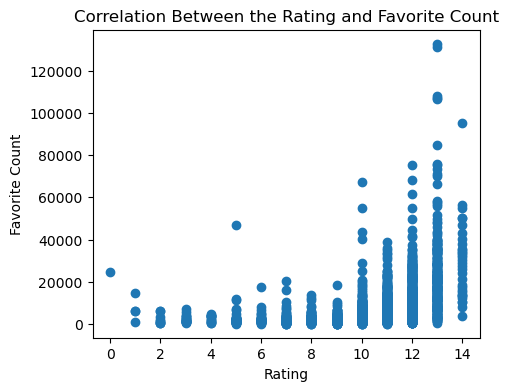

In [81]:
# Set figure size
plt.figure(figsize=(5, 4))
ax = plt.axes()

# Plot
ax.scatter(df_archive_master.rating_numerator, df_archive_master.favorite_count)

# Labeling
ax.set_ylabel('Favorite Count')
ax.set_xlabel('Rating')
ax.set_title('Correlation Between the Rating and Favorite Count')

# Show the visualization
plt.show()

In [82]:
df_archive_master.favorite_count.corr(df_archive_master.rating_numerator)

0.4125236105374723

In [83]:
df_archive_master.retweet_count.corr(df_archive_master.rating_numerator)

0.30931659282143825

Hmm.. interesting. 0.4 is still considered a relatively weak correlation.

### Helper Functions

In [84]:
def barh(x, y, title, xlabel, ylabel, figsize):
    """
    Plots a horizontal bar
    
    Parameters
    ----------
    y : float or array-like
        The y coordinates of the bars. See also *align* for the
        alignment of the bars to the coordinates.
        
    x : float or array-like
        The x coordinates of the left sides of the bars.
        
    title : str
        Text to use for the title
        
    xlabel : str
        Text to use for the x label
        
    ylabel : str
        Text to use for the y label
    """
    
    # Set up figure size
    plt.figure(figsize=figsize)
    ax = plt.axes()

    # Horizontal Bar plot
    ax.barh(x, y)

    # Invert so highest is first
    plt.gca().invert_yaxis()

    # Labels
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.set_title(title)

    # Showing the Visualization
    plt.show()

In [85]:
def bar(x, y, title, xlabel, ylabel, figsize):
    """
    Plots a normal, vertical bar
    
    Parameters
    ----------
    y : float or array-like
        The y coordinates of the bars. See also *align* for the
        alignment of the bars to the coordinates.
        
    x : float or array-like
        The x coordinates of the left sides of the bars.
        
    title : str
        Text to use for the title
        
    xlabel : str
        Text to use for the x label
        
    ylabel : str
        Text to use for the y label
    """
    
    # Set up figure size
    plt.figure(figsize=figsize)
    ax = plt.axes()

    # Horizontal Bar plot
    ax.bar(x, y)

    # Labels
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.set_title(title)

    # Showing the Visualization
    plt.show()

### Highest performing days

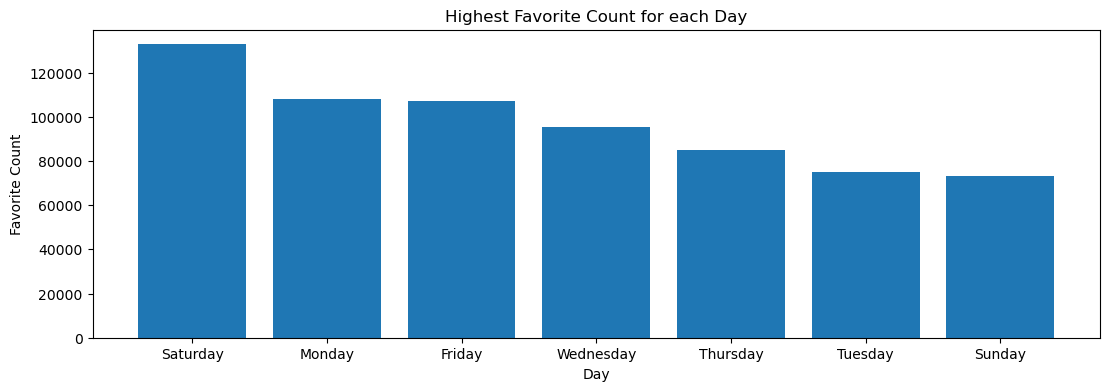

In [86]:
# Sorted data set
top_days = df_archive_master.sort_values('favorite_count', ascending=False)

bar(top_days.day, top_days.favorite_count, 'Highest Favorite Count for each Day', 'Day', 'Favorite Count', (13, 4))

Nice! Saturday, Friday, and Monday are the highest performing days! This may be due to the fact that most holidays are these days, so people have a less busy schedule!

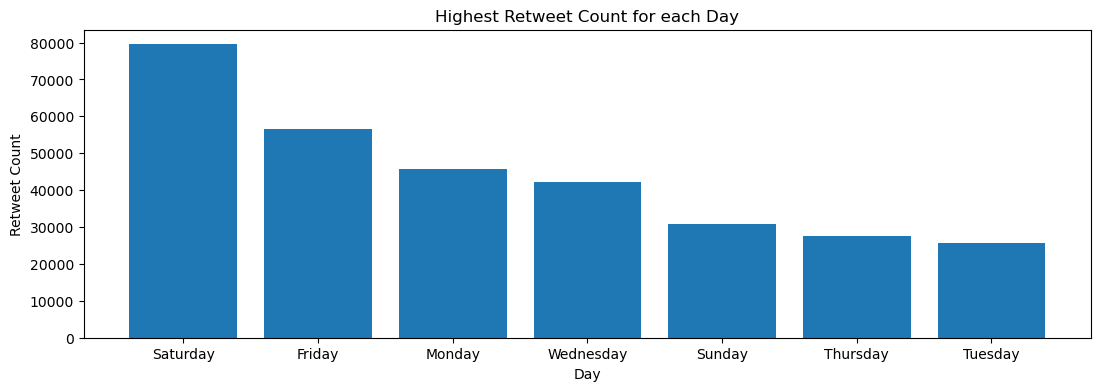

In [87]:
# Sorted data set
top_days = df_archive_master.sort_values('retweet_count', ascending=False)

bar(top_days.day, top_days.retweet_count, 'Highest Retweet Count for each Day', 'Day', 'Retweet Count', (13, 4))

Again.. Saturday, Friday, and Monday are the highest performing days due to the less busy schedules!

### Highest performing breed of dog

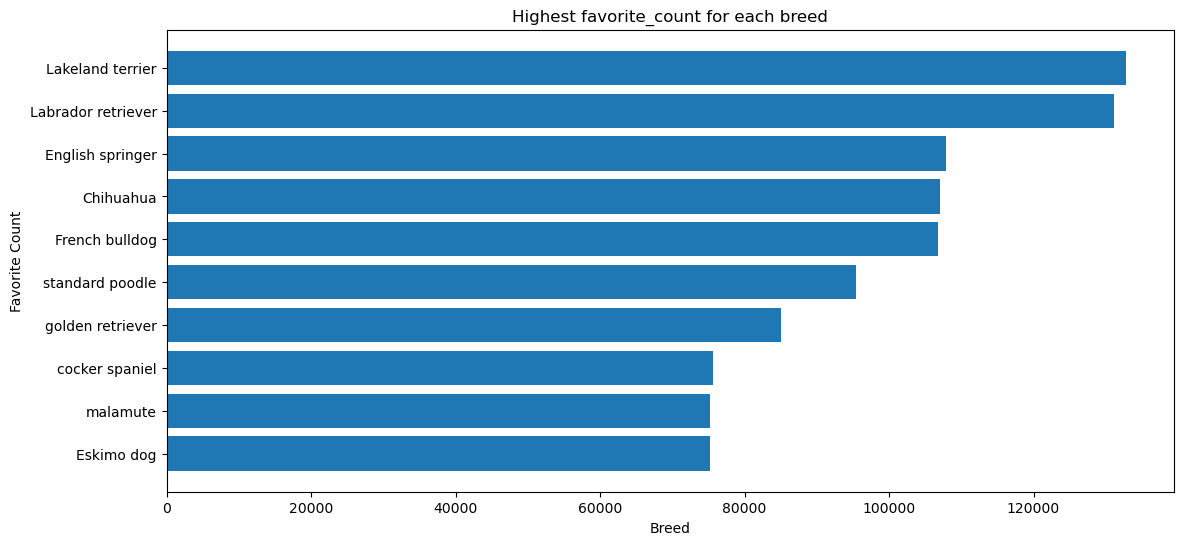

In [88]:
# Getting the top performing breeds in favorite count
top10_breeds = df_archive_master.nlargest(10, 'favorite_count').sort_values('favorite_count', ascending= False)

barh(top10_breeds.breed, top10_breeds.favorite_count, 'Highest favorite_count for each breed', 'Breed', 'Favorite Count', (13, 6))

Lakeland terrier and Labrador retriever are our winners!

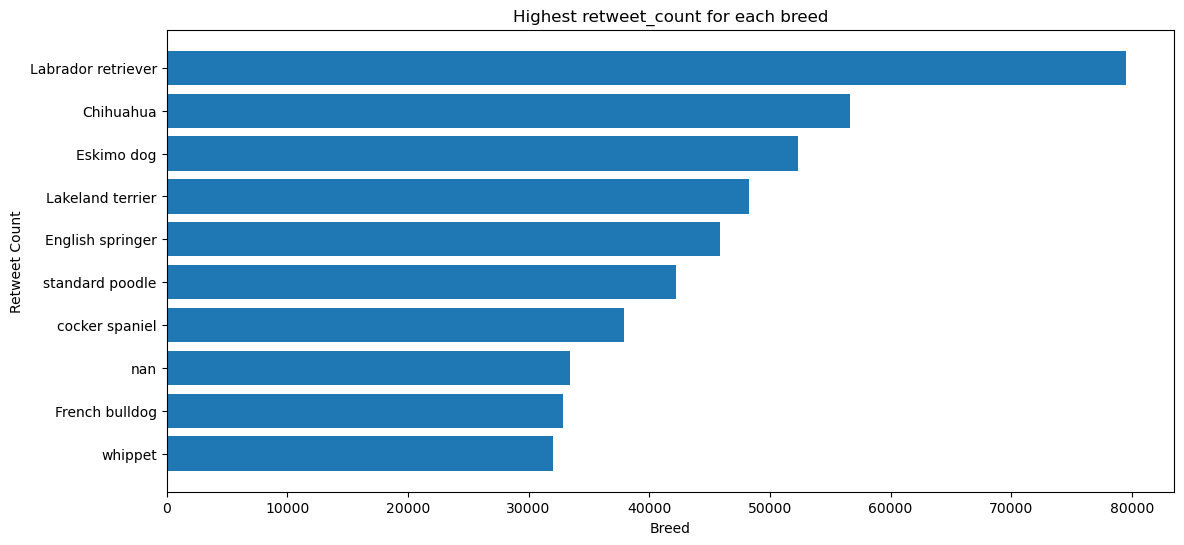

In [89]:
# Getting the top performing breeds in retweet_count
top10_breeds = df_archive_master.nlargest(10, 'retweet_count').sort_values('retweet_count', ascending= False)

# Showing the Visualization
barh(top10_breeds.breed.astype(str), top10_breeds.retweet_count, 'Highest retweet_count for each breed', 'Breed', 'Retweet Count', (13, 6))

Ok.. interesting. We have different results. I will get the intersection between the top 3 as the top #1 breed.

Here, top 3 are Labrador retriever, Chihuahua, and Eskimo dog. The favorite_count top 3 were Lakeland terrier, English springer, and Labrador retriever.

So, the top #1 performing breed is **Labrador retriever**

### Highest performing months

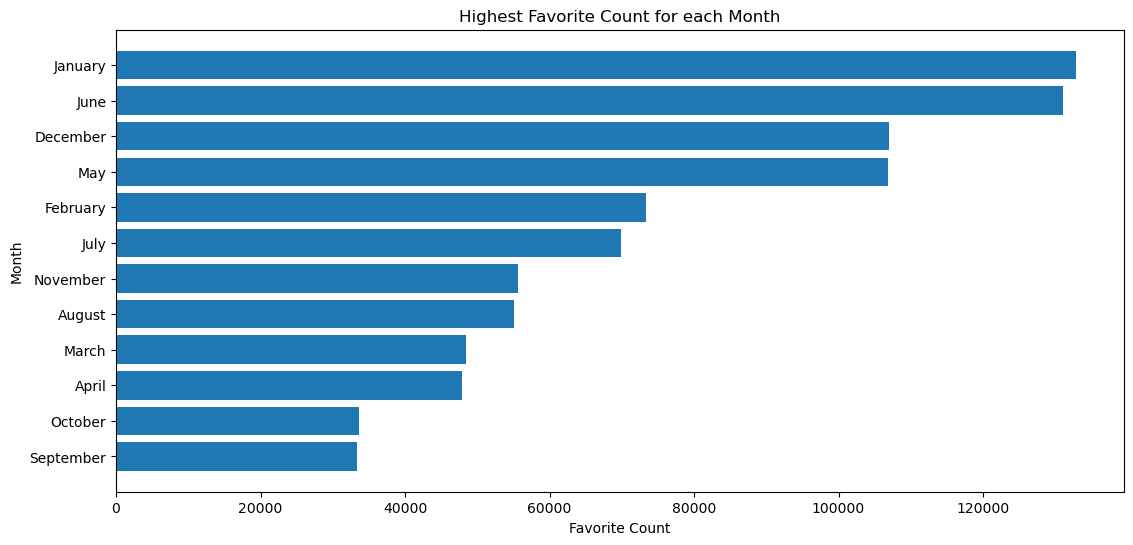

In [90]:
# Sorted data set
top_months = df_archive_master.sort_values(by = 'favorite_count', ascending= False)

# Showing the Visualization
barh(top_months.month, top_months.favorite_count, 'Highest Favorite Count for each Month', 'Favorite Count', 'Month', (13, 6))

Why am I repeating code? I should do a function for visualizations.. time to change my code. (I was doing visualizations without a function in each cell)

Anyways.. here we can see that the highest performing months are: January, June, and December.

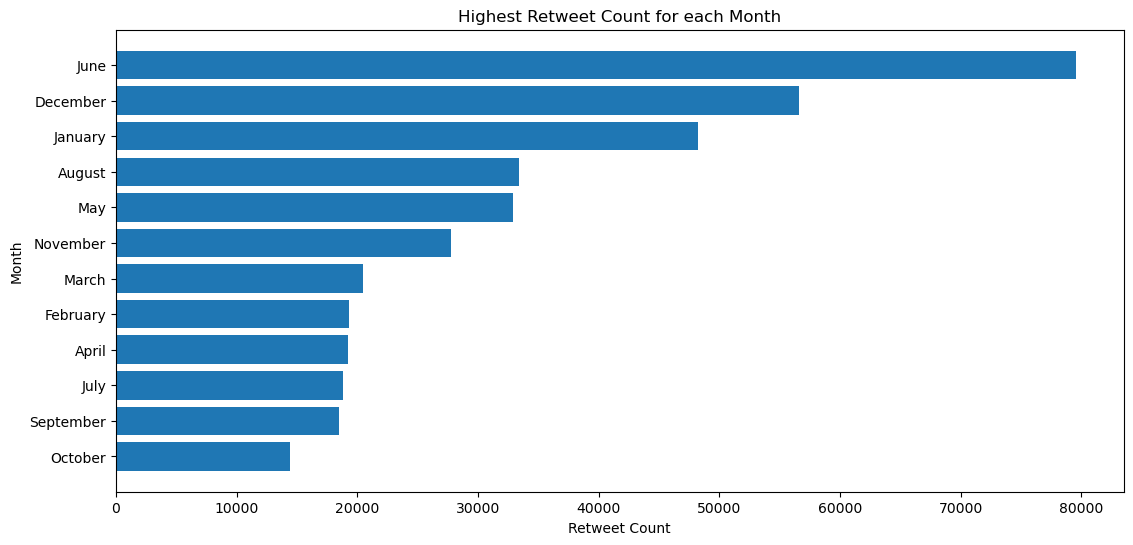

In [91]:
# Sorted data set
top_months = df_archive_master.sort_values(by = 'retweet_count', ascending= False)

# Showing the Visualization
barh(top_months.month, top_months.retweet_count, 'Highest Retweet Count for each Month', 'Retweet Count', 'Month', (13, 6))

Still June, December, and January!
These three months are festive months.. so people may have more time to surf twitter!

June is a month with many holidays and fun days to celebrate such as National Donut Day, National Best Friends Day, and Father’s Day. December is known for its winter solstice which is the year’s shortest day in terms of daylight hours. That specific day can have as many as six hours less sunlight than the longest day that occurs in June depending on where you live. January has many important days such as English New Year, Army Medical Corps Establishment Day, Global Family Day, World Braille Day and more.

June also includes many dog/pet events!

### Correlation between favorite and retweet counts

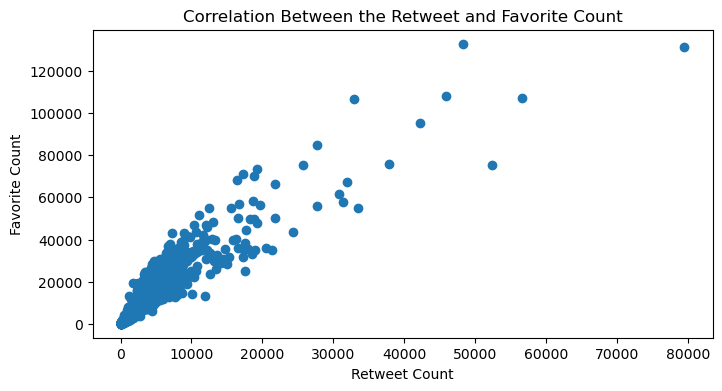

In [92]:
# Set figure size
plt.figure(figsize=(8, 4))
ax = plt.axes()

# Plot
ax.scatter(df_archive_master.retweet_count, df_archive_master.favorite_count)

# Labeling
ax.set_ylabel('Favorite Count')
ax.set_xlabel('Retweet Count')
ax.set_title('Correlation Between the Retweet and Favorite Count')

# Show the visualization
plt.show()

In [93]:
df_archive_master.favorite_count.corr(df_archive_master.retweet_count)

0.9131348097349179

**WOW!** That's a pretty high correlation!! Favorite tweets are more likely to be retweeted!

<a id='conclusions'></a>
# Conclusion
## Insights
This Analysis revealed a lot about the performance of tweets.
> There is no correlation between the rating and the performance of tweets.. any rating will do.

> Tweets posted on Saturdays, Fridays, and Mondays are more likely to receive higher performance due to the less busy schedules.

> Tweets posted on June (the most due to dog events), December, and January are more likely to receive higher performance due to festive events.

> Favorited tweets are very likely to get retweeted too!

However, there are other attributes that I didn't tackle and other limitations.

## Limitation
1. I didn't use the text attribute to fix many of the issues that were found such as wrong ratings and wrong names.
2. I didn't use the name field, the number of images field, the type field, nor the source field all of which can contribute heavily to a tweet's success.

## Next Steps
After I gathered, assessed, and cleaned the dataset, then found the correlation between many features and the success of the tweet, an AI model should be created to accurately predict when is the perfect time to post a tweet, and if the tweet will perform well or perform poorly.

# References
* https://regexr.com
* https://stackoverflow.com/questions/37787698/how-to-sort-pandas-dataframe-from-one-column
* https://sparkbyexamples.com/pandas/pandas-groupby-sort-within-groups/
* https://stackoverflow.com/questions/20069009/pandas-get-topmost-n-records-within-each-group
* https://www.skytowner.com/explore/merging_rows_within_a_group_together_in_pandas
* https://stackoverflow.com/questions/68154806/value-counts-to-count-nans-in-a-dataframe
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html
* https://www.thoughtco.com/fundays-calendar-june-1832497
* https://www.thespruce.com/special-days-and-observances-in-december-1448884
* https://www.edudwar.com/list-of-important-days-and-dates/
* https://projectpaws.org/the-ultimate-list-of-2023-pet-holidays/